<a href="https://colab.research.google.com/github/IvanCampos11/Build-Week-Project/blob/master/Build_Week_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
android = pd.read_csv('https://raw.githubusercontent.com/IvanCampos11/Build-Week-Project/master/googleplaystore.csv')
apple = pd.read_csv('https://github.com/IvanCampos11/Build-Week-Project/raw/master/Applestore.csv')

In [3]:
apple.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
apple = apple.drop(['id','currency','rating_count_ver','user_rating_ver','ipadSc_urls.num','vpp_lic','ver','sup_devices.num'], axis=1)

In [5]:
apple.head()

,Unnamed: 0,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,lang.num
0,1,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games,10
1,2,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping,9
4,5,Bible,92774400,0.00,985920,4.5,4+,Reference,45


In [6]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
android = android.drop(['Android Ver', 'Current Ver', 'Last Updated'], axis=1)

In [8]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [9]:
crosstab = pd.crosstab(android['Category'], android['Rating'])

In [10]:
android.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [11]:
android = android.replace(np.nan, 0)

In [12]:
android.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [13]:
android.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [14]:
android['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [15]:
android['Size'] = android['Size'].str.replace('M', '')
android['Size'] = android['Size'].str.replace('k', '')
indexNames = android['Size'][ android['Size'] == '1,000+' ].index
android['Size'].drop(indexNames , inplace=True)
# android['Size'] = android['Size'][android.Size != '1,000+']

In [16]:
android['Size'].head()

0     19
1     14
2    8.7
3     25
4    2.8
Name: Size, dtype: object

In [17]:
android['Size'] = android['Size'].str.replace('Varies with device', '0')

In [18]:
android['Size'] = android['Size'].astype(float)

In [19]:
android['Size'] = android['Size'].dropna()

In [20]:
android.Size.isnull().sum()

1

In [21]:
android['Installs'] = android['Installs'].str.replace('+', '')
android['Installs'] = android['Installs'].str.replace(',', '')
android['Installs'] = android['Installs'].str.replace('Free', '0')
android['Installs'] = android['Installs'].astype(int)

In [22]:
android.head().dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [23]:
apple.head()

,Unnamed: 0,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,lang.num
0,1,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games,10
1,2,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping,9
4,5,Bible,92774400,0.00,985920,4.5,4+,Reference,45


In [24]:
apple['cont_rating'] = apple['cont_rating'].str.replace('+', '')

In [25]:
apple.head()

,Unnamed: 0,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,lang.num
0,1,PAC-MAN Premium,100788224,3.99,21292,4.0,4,Games,10
1,2,Evernote - stay organized,158578688,0.00,161065,4.0,4,Productivity,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4,Weather,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12,Shopping,9
4,5,Bible,92774400,0.00,985920,4.5,4,Reference,45


In [26]:
apple['cont_rating'] = apple['cont_rating'].astype(int)

In [27]:
apple.dtypes

Unnamed: 0            int64
track_name           object
size_bytes            int64
price               float64
rating_count_tot      int64
user_rating         float64
cont_rating           int64
prime_genre          object
lang.num              int64
dtype: object

In [28]:
apple['size_bytes'] = apple['size_bytes'].astype(float)

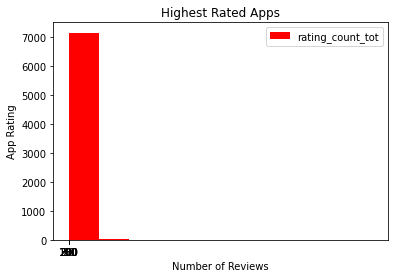

In [36]:
apple.plot(kind='hist',x='user_rating',y='rating_count_tot',color='red')
plt.title('Highest Rated Apps')
plt.xlabel('Number of Reviews')
plt.ylabel('App Rating')
plt.xticks([0,50, 100, 150, 200,250,300])

plt.show()